# Predicting MLB Slugging Percentage

### April 26, 2025

## Introduction

Professional sports teams in the MLB are constantly looking for ways to predict player performance in order to make insightful decisions about who to sign to their team, who's contracts to extend, who to trade, and who to part ways with. Traditionally, baseball is a sport that is immersed in advanced statistics that can give way to comprehensive analytics. More simple metrics such as batting average, home runs, or walks are a bit easier to predict, but also don't give a complete picture of a batter's effectiveness. More advances stats like on base percentage (OBP), slugging percentage (SLG), and on-base plus slugging (OBPS) are more commonly used to show a players output, but are also much harder to predict.

Slugging percentage is a numerical measurement that is used to represent a player's power with more detail than simply looking at their homeruns. SLG is calculated by giving different weights to different base hits. The equation is:

```
slg = (1*1B + 2*2B + 3*3B + 4*HR) / AB
``` 

where 1B, 2B, 3B, and HR stand for a single, double, triple, and homerun, respectively, and AB is the number of at bats. This statistic weighs different types of hits in a manner that at a glance you can see a batter's power, even if it doesn't always translate directly to home runs.

The following analysis will explore, analyze, and identify with statistics are the most effective at determining a player's slugging percentage. With this information, a team could identify which metrics are easy to predict for different players, and plug those variables in and get an accurate prediction of that players slugging percentage, or how much power they will hit with.

## Exploratory Data Analysis (EDA)

### Introduction to Data

This data was downloaded from MLB's official statistics branch, Baseball Savant (https://baseballsavant.mlb.com/). This tool allows users to select certain seasons, qualifications, and which statistics you want to see. Some of the statistics included in this dataset are

* general hitting statistics like plate appearances and batting average
* bat tracking stastics like average bat speed
* exit velocity and launch angle

The data is from 2015 - 2024, and players with at least 50 plate appearances are included. Many players will have multiple entries since they play multiple seasons, but this should not matter when trying to predict slugging percentage.

For reference, here is a table containing every statistic in the data, and what that statistic measures.

| Variable Name      | Definition                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| ------------------ | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| pa                 | A plate appearance refers to a batter's turn at the plate. Each completed turn batting is one plate appearance. Plate appearances can often be confused with at-bats. But unlike with at-bats -- which only occur on certain results -- a plate appearance takes into account every single time a batter comes up and a result between batter and pitcher is obtained.                                                                                                                                                                                      |
| home_run           | A home run occurs when a batter hits a fair ball and scores on the play without being put out or without the benefit of an error.                                                                                                                                                                                                                                                                                                                                                                                                                           |
| walk               | A walk (or base on balls) occurs when a pitcher throws four pitches out of the strike zone, none of which are swung at by the hitter. After refraining from swinging at four pitches out of the zone, the batter is awarded first base. In the scorebook, a walk is denoted by the letters BB.                                                                                                                                                                                                                                                              |
| k_percent          | Strikeout rate represents the frequency with which a pitcher strikes out hitters, as determined by total strikeouts divided by total batters faced.                                                                                                                                                                                                                                                                                                                                                                                                         |
| bb_percent         | Walk rate represents the frequency with which a pitcher walks hitters, as determined by total walks divided by total batters faced. It's an important tool for assessing a pitcher's capabilities and perhaps the most important in judging a pitcher's tendency to walk batters.                                                                                                                                                                                                                                                                           |
| batting_avg        | One of the oldest and most universal tools to measure a hitter's success at the plate, batting average is determined by dividing a player's hits by his total at-bats for a number between zero (shown as .000) and one (1.000). In recent years, the league-wide batting average has typically hovered around .250.                                                                                                                                                                                                                                        |
| slg_percent        | Slugging percentage represents the total number of bases a player records per at-bat. Unlike on-base percentage, slugging percentage deals only with hits and does not include walks and hit-by-pitches in its equation.                                                                                                                                                                                                                                                                                                                                    |
| on_base_percent    | OBP refers to how frequently a batter reaches base per plate appearance. Times on base include hits, walks and hit-by-pitches, but do not include errors, times reached on a fielder's choice or a dropped third strike. (Separately, sacrifice bunts are removed from the equation entirely, because it is rarely a hitter's decision to sacrifice himself, but rather a manager's choice as part of an in-game strategy.)                                                                                                                                 |
| b_rbi              | A batter is credited with an RBI in most cases where the result of his plate appearance is a run being scored. There are a few exceptions, however. A player does not receive an RBI when the run scores as a result of an error or ground into double play.                                                                                                                                                                                                                                                                                                |
| xba                | Expected Batting Average (xBA) is a Statcast metric that measures the likelihood that a batted ball will become a hit.                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| woba               | wOBA is a version of on-base percentage that accounts for how a player reached base -- instead of simply considering whether a player reached base. The value for each method of reaching base is determined by how much that event is worth in relation to projected runs scored (example: a double is worth more than a single).                                                                                                                                                                                                                          |
| xwoba              | Expected Weighted On-base Average (xwOBA) is formulated using exit velocity, launch angle and, on certain types of batted balls, Sprint Speed.                                                                                                                                                                                                                                                                                                                                                                                                              |
| xobp               | xOBP estimates the likelihood of a hit or out based on the quality of contact and the player’s speed                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| avg_swing_speed    | The average speed at which a batter swings the bat                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| fast_swing_rate    | Statcast defines a “fast swing” as one that reaches a swing speed of 75 MPH. A player’s “fast-swing rate” is simply showing the percentage of all of his swings that did reach 75 MPH. In the first month of 2024, 23% of all swings qualified as a ‘fast swing.’                                                                                                                                                                                                                                                                                           |
| blasts_contact     | A blast, in Statcast terms, is when a batter squares up a ball and does so with a high bat speed. (To best understand, please review the definition for [a squared-up ball](https://www.mlb.com/glossary/statcast/squared-up), or the efficiency of a batter’s contact, first.)                                                                                                                                                                                                                                                                             |
| blasts_swing       | A blast, in Statcast terms, is when a batter squares up a ball and does so with a high bat speed. (To best understand, please review the definition for [a squared-up ball](https://www.mlb.com/glossary/statcast/squared-up), or the efficiency of a batter’s contact, first.)                                                                                                                                                                                                                                                                             |
| squared_up_contact | A swing’s squared-up rate tells us how much of the highest possible exit velocity available (based on the physics related to the swing speed and pitch speed) a batter was able to obtain – it is, at its simplest, how much exit velocity did you get as a share of how much exit velocity was possible based on your swing speed and the speed of the pitch. A swing that is 60% squared up, for example, tells you that the batter attained 60% of the maximum possible exit velocity available to him, again based on the speed of the swing and pitch. |
| squared_up_swing   | A swing’s squared-up rate tells us how much of the highest possible exit velocity available (based on the physics related to the swing speed and pitch speed) a batter was able to obtain – it is, at its simplest, how much exit velocity did you get as a share of how much exit velocity was possible based on your swing speed and the speed of the pitch. A swing that is 60% squared up, for example, tells you that the batter attained 60% of the maximum possible exit velocity available to him, again based on the speed of the swing and pitch. |
| exit_velocity_avg  | Exit Velocity measures the speed of the baseball as it comes off the bat, immediately after a batter makes contact. This is tracked for all Batted Ball Events -- outs, hits and errors.                                                                                                                                                                                                                                                                                                                                                                    |
| launch_angle_avg   | Launch Angle measures the vertical angle, in degrees, at which the ball leaves a player's bat after being hit.                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| sweet_spot_percent | Colloquially, a player who hits the ball solidly is said to have gotten the "sweet spot" of the bat on the ball. The sweet spot classification quantifies that as a batted-ball event with a launch angle ranging from 8 to 32 degrees.                                                                                                                                                                                                                                                                                                                     |
| barrel_batted_rate | The Barrel classification is assigned to batted-ball events whose comparable hit types (in terms of exit velocity and launch angle) have led to a minimum .500 batting average and 1.500 slugging percentage since Statcast was implemented Major League wide in 2015.                                                                                                                                                                                                                                                                                      |
| hard_hit_percent   | Statcast defines a 'hard-hit ball' as one hit with an exit velocity of 95 mph or higher, and a player's "hard-hit rate" is simply showing the percentage of batted balls that were hit at 95 mph or more.                                                                                                                                                                                                                                                                                                                                                   |
| whiff_percent      | The ratio of swings and misses to the total number of swings                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| swing_percent      | The percenrage os pitches at which a batter swings                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |

Import packages

In [213]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load datasets

In [214]:
df = pd.read_csv('Data/stats.csv')

In [215]:
print(df.shape)

(5336, 29)


In [216]:
df.columns

Index(['last_name, first_name', 'player_id', 'year', 'pa', 'home_run', 'walk',
       'k_percent', 'bb_percent', 'batting_avg', 'slg_percent',
       'on_base_percent', 'b_rbi', 'xba', 'woba', 'xwoba', 'xobp',
       'avg_swing_speed', 'fast_swing_rate', 'blasts_contact', 'blasts_swing',
       'squared_up_contact', 'squared_up_swing', 'exit_velocity_avg',
       'launch_angle_avg', 'sweet_spot_percent', 'barrel_batted_rate',
       'hard_hit_percent', 'whiff_percent', 'swing_percent'],
      dtype='object')

In [217]:
print(df.dtypes)

last_name, first_name     object
player_id                  int64
year                       int64
pa                         int64
home_run                   int64
walk                       int64
k_percent                float64
bb_percent               float64
batting_avg              float64
slg_percent              float64
on_base_percent          float64
b_rbi                      int64
xba                      float64
woba                     float64
xwoba                    float64
xobp                     float64
avg_swing_speed          float64
fast_swing_rate          float64
blasts_contact           float64
blasts_swing             float64
squared_up_contact       float64
squared_up_swing         float64
exit_velocity_avg        float64
launch_angle_avg         float64
sweet_spot_percent       float64
barrel_batted_rate       float64
hard_hit_percent         float64
whiff_percent            float64
swing_percent            float64
dtype: object


### Data Cleaning & Preprocessing

Let's first check for null or missing data.

In [218]:
df.isna().sum()

last_name, first_name       0
player_id                   0
year                        0
pa                          0
home_run                    0
walk                        0
k_percent                   0
bb_percent                  0
batting_avg                 0
slg_percent                 0
on_base_percent             0
b_rbi                       0
xba                         0
woba                        0
xwoba                       0
xobp                        0
avg_swing_speed          4306
fast_swing_rate          4306
blasts_contact           4306
blasts_swing             4306
squared_up_contact       4306
squared_up_swing         4306
exit_velocity_avg           0
launch_angle_avg            0
sweet_spot_percent          0
barrel_batted_rate          0
hard_hit_percent            0
whiff_percent               0
swing_percent               0
dtype: int64

There are a number of missing values for a few of the statistics. This is due to which stats are tracked given the year. The entire dataset only back to 2015, however, certain advanced metrics related to bat tracking were not collected this entire time. The bat tracking metrics are only available starting from the second half of the 2023 season. Due to this, I will create multiple dataframes to separate the data containing these metrics from the rest, and compare how well the models work at the end to see how important these are for slugging percentage.

In [219]:
# Store data with bat tracking metrics
df_tracking = df[~df.isna().any(axis=1)]
df_tracking.isna().sum()

last_name, first_name    0
player_id                0
year                     0
pa                       0
home_run                 0
walk                     0
k_percent                0
bb_percent               0
batting_avg              0
slg_percent              0
on_base_percent          0
b_rbi                    0
xba                      0
woba                     0
xwoba                    0
xobp                     0
avg_swing_speed          0
fast_swing_rate          0
blasts_contact           0
blasts_swing             0
squared_up_contact       0
squared_up_swing         0
exit_velocity_avg        0
launch_angle_avg         0
sweet_spot_percent       0
barrel_batted_rate       0
hard_hit_percent         0
whiff_percent            0
swing_percent            0
dtype: int64

The next concern to address is the number of plate appearances (pa), or the amount of at bats a player had that season.

In [220]:
df[['pa', 'batting_avg', 'home_run', 'slg_percent']].describe()

,pa,batting_avg,home_run,slg_percent
count,5336.000000,5336.000000,5336.000000,5336.000000
mean,314.392616,0.236105,9.978823,0.385226
std,200.266348,0.047529,9.737093,0.098708
min,50.000000,0.000000,0.000000,0.000000
25%,132.000000,0.211000,2.000000,0.329000
50%,274.000000,0.242000,7.000000,0.391000
75%,484.250000,0.267000,15.000000,0.448000
max,753.000000,0.400000,62.000000,0.755000


The MLB lists minimum qualifications that must be met for players to qualify for certain leaderboards. This prevents a player for example who only had 1 at bat the entire season and got a hit from leading the entire MLB with a 1.0 batting average. For hitters, this minimum amount is 3.1 PA's a game. There are a number of specifics to this calculation, such as when teams play one more or one fewer games, when players are active or not, as well as a specific rookie standard.

This is something we want ot think about before creating our models. Ensuring players have "enough" at bats in a season can help ensure the findings are statistacally relevant, and resistant to being swayed by outliers. Let's visualize the distribution of plate appearances to see if it might have a significant impact on our models.

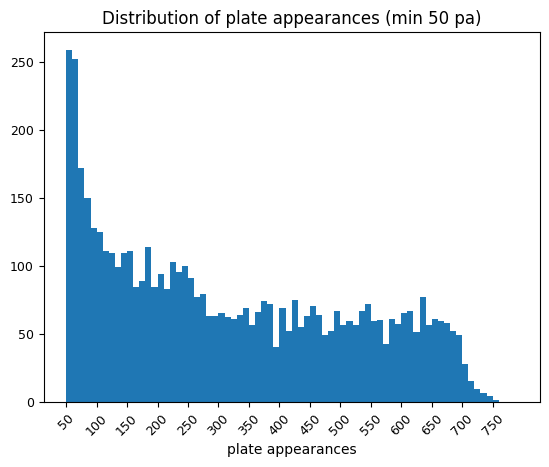

In [221]:
plt.hist(df['pa'], bins=range(50, 800, 10))
plt.xticks(range(50, 800, 50), rotation=45, fontsize=9)
plt.yticks(fontsize=9)
plt.title('Distribution of plate appearances (min 50 pa)')
plt.xlabel('plate appearances')
plt.show()

We can see the distribution is skewed right by a significant margin. Let's separate the data and see how the distribution looks. A boxplot can also be helpful to look for outliers and get an overview of general distribution.

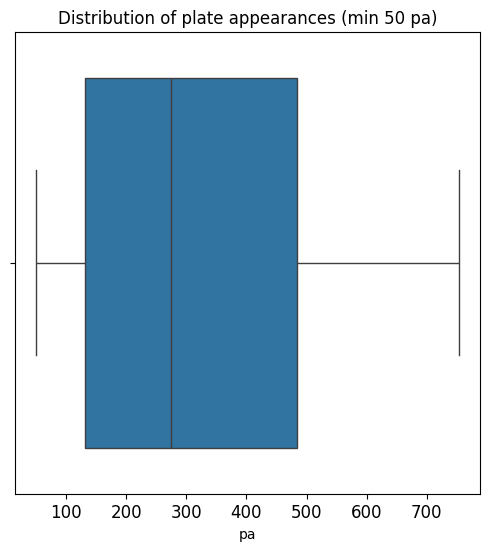

In [222]:
plt.figure(figsize=(6,6))
plt.title('Distribution of plate appearances (min 50 pa)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df['pa'])
plt.show()

There are no outliers apparant from the boxplot, but we do see again that the data is skewed right by a large margin. We can make some quick calculations to find out exavtly how much of the data are outliers.

In [223]:
# Calculate percentiles and IQR
p_25 = df['pa'].quantile(0.25)
p_75 = df['pa'].quantile(0.75)
iqr = p_75 - p_25

# Calculate upper and lower limits and find outliers
upper_limit = p_75 + iqr
lower_limit = p_25 - iqr
outliers = df[(df['pa'] > upper_limit) | (df['pa'] < lower_limit)]

# Print  findings
print(f'Upper limit: {upper_limit:.2f}')
print(f'Lower limit: {lower_limit:.2f}')
print(f"Number of outliers in 'pa': {len(outliers)}")

Upper limit: 836.50
Lower limit: -220.25
Number of outliers in 'pa': 0


Mathematically speaking, there are no outliers in our data for plate appearances. The lower limit being a negative number stands out a bit, but it makes sense when you consider how much of the data is at or near the minimum value of 50, and how large the range of the data is. Before we begin any machine learning, I want to create a separate dataframe with only the rows that have a pa value that would qualify for the MLB leaderboards.

To keep things simple, I will apply a blanket qualification by multiplying 3.1 by the number of games each team is expected to play, 162. This will be a cutoff value that I will also use to separate the data to see if this minimum amount has significant impact in our model's performance.

In [224]:
# Setting cutoff value
# Adding one and casting int to "round up" without importing math
pa_cutoff = int(3.1 * 162 + 1)
print(f'Our PA cutoff value: {pa_cutoff}')

Our PA cutoff value: 503


In [225]:
df_min = df[df['pa'] >= pa_cutoff]
df_min[['pa', 'batting_avg', 'home_run', 'slg_percent']].describe()

,pa,batting_avg,home_run,slg_percent
count,1229.000000,1229.000000,1229.000000,1229.000000
mean,605.694060,0.266531,21.852726,0.450853
std,60.320837,0.027142,10.028069,0.063866
min,503.000000,0.168000,0.000000,0.273000
25%,551.000000,0.248000,14.000000,0.407000
50%,605.000000,0.265000,21.000000,0.445000
75%,655.000000,0.284000,29.000000,0.491000
max,753.000000,0.354000,62.000000,0.701000


When comparing this dataset to the one including all players above 50 PA's, we can see the average statistics like batting average and slugging percentage do go up, with a sharp increase in discrete measurements like home runs. Now let's visualize the entire dataframe next to this dataframe with the minimum pa cutoff value applied.

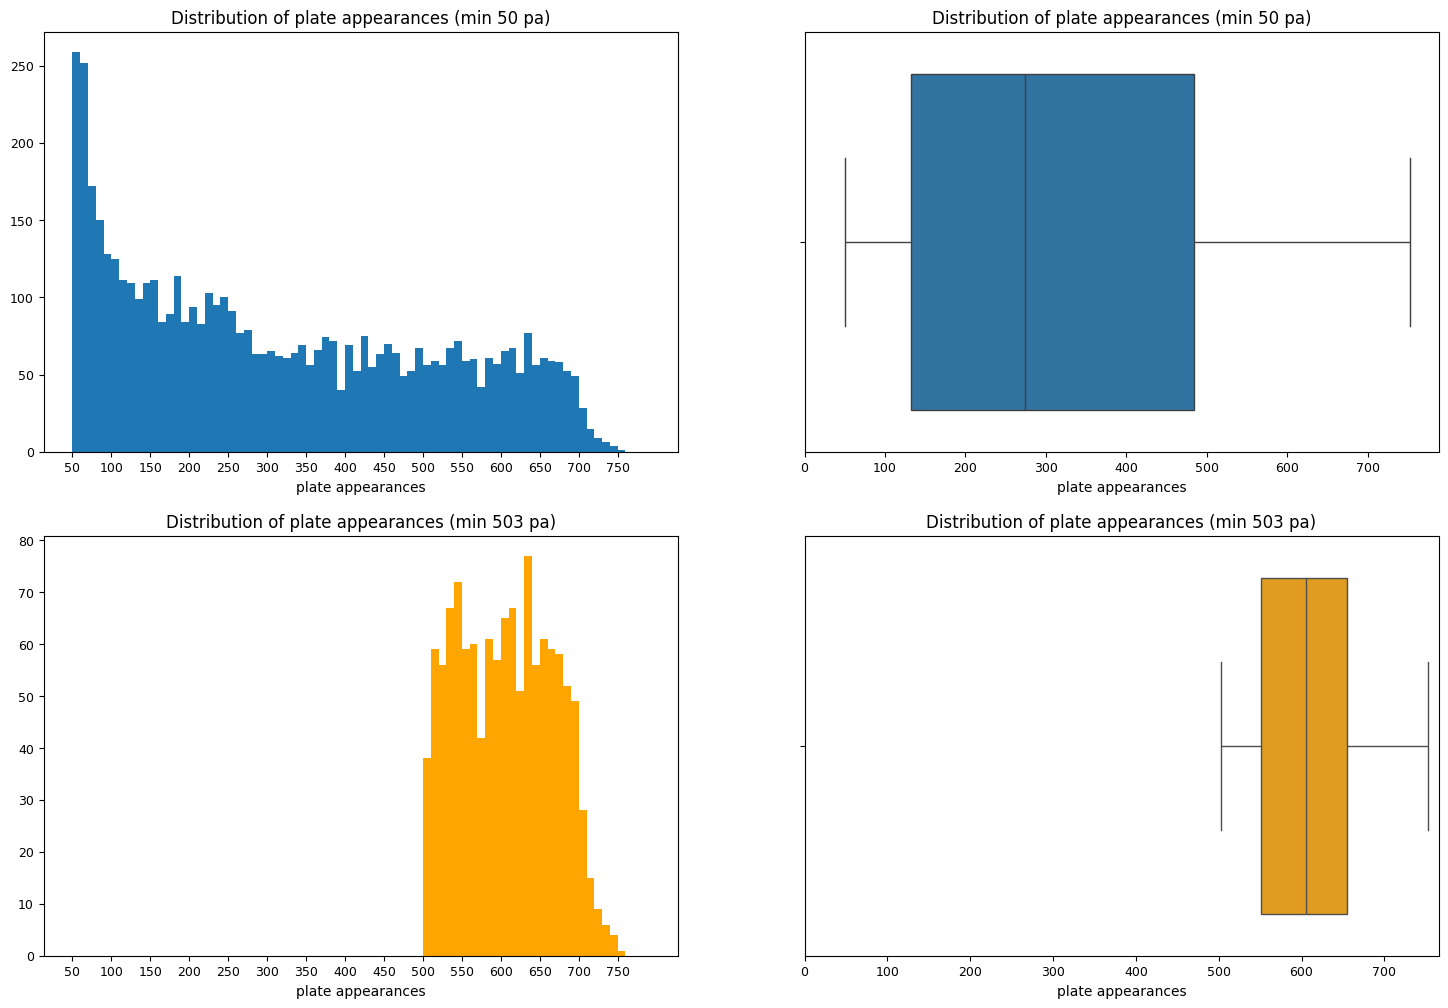

In [226]:
# Set figure and axes
fig, ax = plt.subplots(2, 2, figsize=(18,12))

# Create hist of pa's for all data
ax[0][0].hist(df['pa'], bins=range(50, 800, 10))
ax[0][0].set_xticks(range(50, 800, 50))
ax[0][0].tick_params(axis='both', which='major', labelsize=9)
ax[0][0].set_title('Distribution of plate appearances (min 50 pa)')
ax[0][0].set_xlabel('plate appearances')

# Create hist of pa's for those above cutoff value
ax[1][0].hist(df_min['pa'], bins=range(50, 800, 10), color='orange')
ax[1][0].set_xticks(range(50, 800, 50))
ax[1][0].tick_params(axis='both', which='major', labelsize=9)
ax[1][0].set_title('Distribution of plate appearances (min 503 pa)')
ax[1][0].set_xlabel('plate appearances')

# Create boxplot of pa's for all data
sns.boxplot(x=df['pa'], ax=ax[0][1])
ax[0][1].set_title('Distribution of plate appearances (min 50 pa)')
ax[0][1].tick_params(axis='both', which='major', labelsize=9)
ax[0][1].set_xticks(range(0, 800, 100))
ax[0][1].set_xlabel('plate appearances')

# Create boxplot of pa's for those above cutoff value
sns.boxplot(x=df_min['pa'], ax=ax[1][1], color='orange')
ax[1][1].set_title('Distribution of plate appearances (min 503 pa)')
ax[1][1].tick_params(axis='both', which='major', labelsize=9)
ax[1][1].set_xticks(range(0, 800, 100))
ax[1][1].set_xlabel('plate appearances')

# Show plots
plt.show()

The plots are vertically aligned and have the same scale on the x-axis to better compare them. We can see the distributions are much less skewed, especially from the boxplots. The range of values above the 75th percentile is much smaller than for the whole dataset.

We will create another dataset for minimum plate appearances containing only rows with bat tracking metrics as well.

In [227]:
df_tracking_min = df_tracking[df_tracking['pa'] >= pa_cutoff]
print('Stats for seasons with bat tracking metrics:')
print(df_tracking[['pa', 'batting_avg', 'home_run', 'slg_percent']].describe())

print('\nStats for seasons with bat tracking metrics and minimum number of pa:')
print(df_tracking_min[['pa', 'batting_avg', 'home_run', 'slg_percent']].describe())

Stats for seasons with bat tracking metrics:
                pa  batting_avg    home_run  slg_percent
count  1030.000000  1030.000000  1030.00000  1030.000000
mean    346.541748     0.236545    10.82233     0.385516
std     195.993013     0.038318     9.58084     0.083411
min      50.000000     0.077000     0.00000     0.129000
25%     168.000000     0.214000     3.00000     0.332000
50%     336.000000     0.239500     8.00000     0.384000
75%     508.000000     0.262000    16.00000     0.441000
max     753.000000     0.380000    58.00000     0.717000

Stats for seasons with bat tracking metrics and minimum number of pa:
               pa  batting_avg    home_run  slg_percent
count  262.000000   262.000000  262.000000   262.000000
mean   610.793893     0.259958   21.751908     0.440195
std     62.255526     0.025313    9.348279     0.061175
min    503.000000     0.196000    1.000000     0.296000
25%    556.000000     0.244250   15.000000     0.399000
50%    614.000000     0.258500   21

In [228]:
df.dtypes

last_name, first_name     object
player_id                  int64
year                       int64
pa                         int64
home_run                   int64
walk                       int64
k_percent                float64
bb_percent               float64
batting_avg              float64
slg_percent              float64
on_base_percent          float64
b_rbi                      int64
xba                      float64
woba                     float64
xwoba                    float64
xobp                     float64
avg_swing_speed          float64
fast_swing_rate          float64
blasts_contact           float64
blasts_swing             float64
squared_up_contact       float64
squared_up_swing         float64
exit_velocity_avg        float64
launch_angle_avg         float64
sweet_spot_percent       float64
barrel_batted_rate       float64
hard_hit_percent         float64
whiff_percent            float64
swing_percent            float64
dtype: object